In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

from collections import Counter
import re

In [2]:
df = pd.read_csv('../data/Sei/Sei_tracks_info.csv')

df_pivot = df.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)

df_pivot

assay                    ADNP AEBP2 AFF1 AFF4 AGO1 AGO2  AHR AHRR AP-2alpha AP-2gamma APOBEC3B   AR ARID1A ARID2 ARID3A ARID5B ARNT ARNT2 ARNTL ARRB1 ASCL1 ASCL2 ASH1L ASH2L ASXL1 ATAC-seq ATF1 ATF2 ATF3 ATF4 ATF5 ATF7IP ATOH1 ATRX AUTS2 BACH1 BACH2 BAF155 BAF170 BAHD1 BANF1 BANP BARX1 BARX2 BATF BATF3 BCAT1 BCL11A BCL11B BCL3 BCL6 BCLAF1 BCOR BDP1 BHLHE40 BIRA BMI1 BPTF BRAF BRCA1 BRD1 BRD2    BRD3    BRD4 BRD7 BRD9 BRDU BRF1 BRF2 BRPF3 BTAF1 Bach1 Brg1 C11orf30 C17orf49 C17orf96 CAMTA2 CASP8AP2 CBFA2T2 CBFB CBX1 CBX2 CBX3 CBX4 CBX5 CBX6 CBX7 CBX8 CCDC101 CCND2 CCNT2 CD59 CD74 CDC5L CDCA2 CDK12 CDK2 CDK6 CDK7 CDK8 CDK9 CDX2 CEBPA CEBPB CEBPD CEBPG CEBPZ CENPA CENPC CENPT CHAMP1 CHAT CHD1 CHD2 CHD4 CHD5 CHD7 CHD8 CHRM2 CIITA CLOCK CNOT3 COPS2 COREST CPSF3L CREB1 CREB3 CREB3L4 CREBBP CREM CRY1 CSDE1 CSNK2A1 CTBP1 CTBP2 CTCF CTCFL CTNNB1 CUX1 CtBP2 DACOR1 DAXX DCP1A DDX20 DDX21 DDX5 DEAF1  DEK DIDO1 DLX1 DLX2 DMC1 DNMT1 DNMT3A DNMT3B    DNase DNase.all.peaks DNase.fdr0.01.hot  \
cell_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1015c                     NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN    NaN   NaN    NaN    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN  NaN  NaN    NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN     NaN  [8996]  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN      NaN      NaN      NaN    NaN      NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN     NaN    NaN  NaN  NaN   NaN     NaN   NaN   NaN  NaN   NaN    NaN  NaN   NaN    NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN    NaN      NaN             NaN               NaN   
10326                     NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN       NaN       NaN      NaN  NaN    NaN   NaN    NaN    NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN      NaN  NaN  NaN  NaN  NaN  NaN    NaN   NaN  NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN  NaN   NaN   NaN  NaN   NaN   NaN    NaN    NaN  NaN  NaN    NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  [8997]     NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN  NaN      NaN      NaN      NaN    NaN      NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN   NaN   NaN  NaN  NaN   NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   NaN   NaN     NaN    NaN  NaN  NaN   NaN     NaN   NaN   NaN  NaN   NaN    NaN  NaN   NaN    NaN  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN  NaN  NaN  NaN   NaN    NaN    NaN      NaN             NaN               NaN   
1184_Stem_cell            NaN   

In [4]:
# # assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

# cell_types = ['K562', 'HepG2']
# cell_types_standard_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma']

In [3]:
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']

cell_types = ['K562', 'HepG2', 'WTC11']
cell_types_standard_names = ['K562_Leukemia_Cell', 'HepG2_Hepatocellular_Carcinoma', 'iPSC']

In [4]:
df_track = df_pivot.loc[cell_types_standard_names][assays]
df_track.map(lambda x: len(x) if isinstance(x, list) else 0)

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562_Leukemia_Cell,58,91,51,34,11,5,29,29
HepG2_Hepatocellular_Carcinoma,9,8,9,2,4,3,2,17
iPSC,5,13,6,10,8,6,8,0


In [14]:
####### Agarwal_MPRA

pred_array = load_h5('outputs/Agarwal_MPRA_Sei_pred.h5')
print(pred_array.shape)

(56975, 21907)


In [15]:
MPRA_df = pd.read_csv('../data/Agarwal_MPRA/Agarwal_MPRA_joint_56k.csv')
print(MPRA_df.shape)

(56975, 5)


In [7]:
for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_track.loc[cell_types_standard_names[i], assay]

        if isinstance(indice, list) and len(indice) > 0:
            for idx in indice:
                # pred = logit(pred_array[:, idx])
                pred = pred_array[:, idx]
                true = MPRA_df[cell_type]
                r, _ = pearson(pred, true)
                print(cell_type, assay, idx, r)


K562 DNase 1490 0.1564945636322182
K562 DNase 2919 0.36867279940774594
K562 DNase 3167 0.3560317314355148
K562 DNase 4632 0.4267227294359829
K562 DNase 4633 0.4057408152788118
K562 DNase 10715 0.4334496661609215
K562 DNase 10716 0.4244396649548687
K562 DNase 10717 0.3824971047266812
K562 DNase 10718 0.31658962929814854
K562 DNase 10719 0.41503062808911767
K562 DNase 10720 0.3733159409263635
K562 DNase 10721 0.3447389752637583
K562 DNase 10722 0.3605225758981921
K562 DNase 10723 0.4054560350703966
K562 DNase 10724 0.3762038700775189
K562 DNase 10725 0.4079328296011439
K562 DNase 10726 0.3994508028083022
K562 DNase 10727 0.37895211841326315
K562 DNase 10728 0.5004709207754121
K562 DNase 10729 0.36095976770085636
K562 DNase 10730 0.34039258442958126
K562 DNase 10731 0.3920433546366687
K562 DNase 10732 0.4023273919070218
K562 DNase 10749 0.3925737741764488
K562 DNase 10817 0.3369741398948547
K562 DNase 10822 0.4698452170607991
K562 DNase 10857 0.4257180847462765
K562 DNase 10954 0.39836746

In [8]:
# not logit

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = df_track.loc[cell_types_standard_names[i], assay]
        if isinstance(indice, list) and len(indice) > 0:
            pred = pred_array[:, indice].mean(1)
            true = MPRA_df[cell_type]
            MPRA_df[f'{cell_type}_{assay}'] = pred
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan

MPRA_df

,seq,chr,HepG2,K562,WTC11,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,WTC11_DNase,WTC11_H3K4me3,WTC11_H3K27ac,WTC11_H3K27me3,WTC11_H3K4me1,WTC11_H3K36me3,WTC11_H3K9me3,WTC11_CTCF
0,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,chr1,0.633,0.080,-0.387,0.038,0.017,0.006,0.004,0.012,0.001,0.130,0.001,0.015,0.012,0.002,0.013,0.002,0.001,0.032,0.002,0.084,0.007,0.006,0.001,0.018,0.004,0.036,NaN
1,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,chr10,-1.157,-1.147,-1.507,0.007,0.002,0.001,0.002,0.003,0.001,0.004,0.001,0.004,0.002,0.000,0.021,0.002,0.001,0.030,0.001,0.025,0.002,0.001,0.004,0.004,0.001,0.010,NaN
2,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,chr10,-0.066,0.186,0.655,0.512,0.002,0.001,0.001,0.013,0.001,0.008,0.825,0.319,0.008,0.001,0.001,0.001,0.000,0.006,0.911,0.917,0.016,0.001,0.003,0.001,0.000,0.001,NaN
3,AGGACCGGATCAACTGACCCTAAATCAGTATGGGGAAAGGTCCCCA...,chr10,0.846,1.212,-0.637,0.086,0.005,0.005,0.003,0.016,0.000,0.010,0.002,0.062,0.011,0.005,0.005,0.007,0.001,0.020,0.002,0.439,0.035,0.046,0.003,0.025,0.001,0.003,NaN
4,AGGACCGGATCAACTGTGATCTCAGCTTACTGCAACCTCTGCCTCC...,chr10,-0.784,-0.630,-0.612,0.010,0.000,0.000,0.001,0.000,0.000,0.027,0.102,0.001,0.000,0.000,0.000,0.000,0.000,0.009,0.201,0.035,0.000,0.000,0.000,0.000,0.000,0.001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56970,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.192,-1.080,-1.680,0.006,0.003,0.001,0.002,0.002,0.001,0.007,0.000,0.002,0.002,0.001,0.009,0.001,0.001,0.022,0.000,0.006,0.001,0.000,0.001,0.000,0.001,0.006,NaN
56971,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-0.582,-1.094,-1.637,0.017,0.003,0.002,0.001,0.005,0.001,0.003,0.000,0.008,0.006,0.002,0.002,0.004,0.000,0.019,0.000,0.006,0.000,0.000,0.001,0.000,0.000,0.003,NaN
56972,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCATGTTTGCTTT...,chrnan,-0.855,-0.554,-1.083,0.017,0.002,0.002,0.002,0.004,0.002,0.002,0.001,0.627,0.036,0.026,0.001,0.052,0.000,0.003,0.017,0.040,0.004,0.001,0.029,0.004,0.001,0.000,NaN
56973,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.231,-0.927,-1.606,0.002,0.001,0.001,0.001,0.001,0.001,0.003,0.000,0.002,0.001,0.001,0.004,0.001,0.001,0.019,0.000,0.004,0.000,0.000,0.001,0.000,0.000,0.003,NaN


In [9]:
pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

after remove nan, len(x) < 2, pearson = nan


,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
K562,0.399,0.343,0.306,0.038,0.269,0.081,0.161,-0.002
HepG2,0.242,0.221,0.240,-0.095,0.231,0.054,0.030,-0.108
WTC11,0.426,0.248,0.236,0.056,0.120,0.202,0.044,NaN


In [10]:
assay = 'DNase'
cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]

pearson_df = pd.DataFrame(index=cell_types, columns=cell_types_assay)
for cell_type in cell_types:
    for cell_type_pred in cell_types_assay:
        df = MPRA_df
        x = df[f'{cell_type}']
        y = df[f'{cell_type_pred}']
        r = pearson(x, y)[0]
        pearson_df.loc[cell_type, cell_type_pred] = r
print(pearson_df)

      K562_DNase HepG2_DNase WTC11_DNase
K562       0.399       0.065       0.162
HepG2      0.201       0.242       0.094
WTC11      0.324       0.207       0.426


In [11]:
MPRA_df['WTC11_CTCF'] = 0

In [12]:
MPRA_df.to_csv('../data/Agarwal_MPRA/Agarwal_MPRA_Sei_feature_0507.csv', index=False)

<Axes: xlabel='K562', ylabel='K562_DNase'>

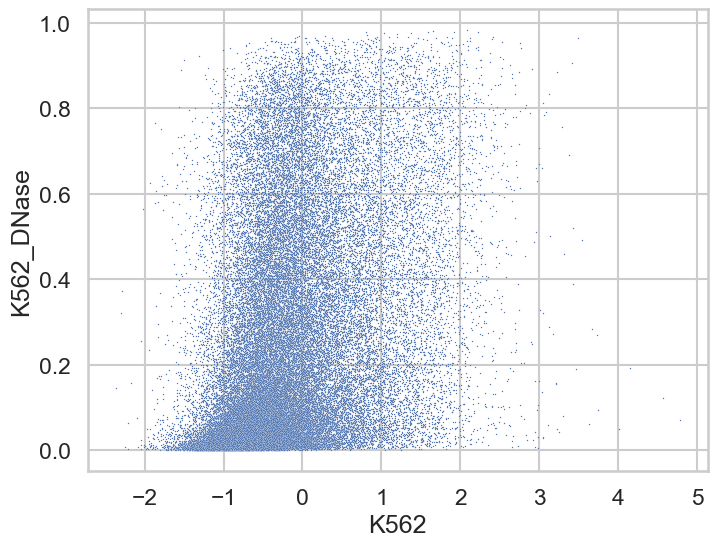

In [13]:
x = MPRA_df['K562']
y = MPRA_df['K562_DNase']
sns.scatterplot(x=x, y=y, s=1)

In [12]:
# pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

# for i, cell_type in enumerate(cell_types):
#     for j, assay in enumerate(assays):
#         indice = df_track.loc[cell_types_standard_names[i], assay]

#         if isinstance(indice, list) and len(indice) > 0:
#             for idx in indice:
#                 pred = logit(pred_array[:, idx])
#                 true = MPRA_df[cell_type]
#                 r, _ = pearson(pred, true)
#                 print(cell_type, assay, idx, r)

#             pred = logit(pred_array[:, indice], eps=0).mean(1)
#             true = MPRA_df[cell_type]
#             r, _ = pearson(pred, true)
#             pearson_df.loc[cell_type, assay] = r
#             MPRA_df[f'{cell_type}_{assay}'] = pred
#         else:
#             MPRA_df[f'{cell_type}_{assay}'] = np.nan

# pearson_df

In [45]:
pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

,DNase,H3K4me3,H3K27ac,CTCF
K562,0.450,0.459,0.426,0.076
HepG2,0.334,0.339,0.352,-0.034


In [47]:
# normalize between different cell types and assays

norm_params = pd.read_csv('outputs/Sei_feature_norm_parameters.csv', index_col=0)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        
        x = MPRA_df[f'{cell_type}_{assay}']

        x_mean = norm_params.loc['Gosai_MPRA_train', f'{cell_type}_{assay}_mean']
        x_std = norm_params.loc['Gosai_MPRA_train', f'{cell_type}_{assay}_std']
        print(x_mean, x_std)
        x = (x - x_mean) / x_std
        
        ######
        x[x<0] = 0
        ######

        MPRA_df[f'{cell_type}_{assay}'] = x

-6.417223285308433 1.9469177478992024
-8.963800672911345 1.6842842596202077
-8.37802168987605 1.1557352256723057


KeyError: 'K562_H3K27me3_mean'

In [43]:
MPRA_df

,seq,chr,HepG2,K562,WTC11,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF
0,AGGACCGGATCAACTGTAGGACCAGGCTCTGCCTCCTTCTCTCTCC...,chr1,0.633,0.080,-0.387,1.528,2.065,1.971,-6.207,-5.281,-8.028,-3.572,0.949,1.241,1.943,1.526,-4.622,-6.464,-7.187,-3.427,0.865
1,AGGACCGGATCAACTTGTACTTGCCTTAGGAGGTCAAACACATTAG...,chr10,-1.157,-1.147,-1.507,0.599,0.946,0.564,-6.399,-6.249,-8.733,-6.049,0.563,0.667,0.920,0.727,-4.510,-6.444,-7.940,-3.510,0.635
2,AGGACCGGATCAACTTAGCTCAACACAAATCCATCACTGAAAGCAG...,chr10,-0.066,0.186,0.655,3.294,1.199,0.505,-7.608,-6.247,-7.947,-5.339,5.599,2.986,1.780,1.271,-7.291,-6.640,-8.013,-5.124,5.660
3,AGGACCGGATCAACTGACCCTAAATCAGTATGGGGAAAGGTCCCCA...,chr10,0.846,1.212,-0.637,1.940,1.726,2.129,-6.507,-4.444,-8.702,-5.328,1.059,2.013,1.823,2.210,-5.681,-5.088,-8.140,-3.958,1.090
4,AGGACCGGATCAACTGTGATCTCAGCTTACTGCAACCTCTGCCTCC...,chr10,-0.784,-0.630,-0.612,0.675,0.000,0.000,-8.398,-8.754,-10.251,-5.086,3.078,0.000,0.000,0.000,-9.262,-9.425,-9.639,-4.946,3.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56970,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.192,-1.080,-1.680,0.575,1.192,1.006,-6.592,-6.735,-9.013,-5.632,0.415,0.216,1.027,0.824,-4.938,-7.513,-8.039,-3.846,0.251
56971,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-0.582,-1.094,-1.637,1.085,1.397,1.176,-7.062,-5.850,-9.326,-6.348,0.142,0.951,1.414,1.144,-6.196,-5.874,-9.238,-3.973,0.170
56972,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCATGTTTGCTTT...,chrnan,-0.855,-0.554,-1.083,0.909,1.161,1.147,-7.050,-5.873,-8.751,-6.727,0.689,3.845,2.240,2.768,-6.771,-3.316,-9.631,-5.968,1.846
56973,AGGACCGGATCAACTCCAAGTCTGCCATCGTGTTCAGAAGGGCCAG...,chrnan,-1.231,-0.927,-1.606,0.035,0.370,0.180,-7.004,-7.649,-9.706,-6.395,0.000,0.206,0.611,0.546,-5.795,-7.164,-8.870,-3.975,0.026


In [41]:
pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        pred = MPRA_df[f'{cell_type}_{assay}']
        true = MPRA_df[cell_type]
        r, _ = pearson(pred, true)
        pearson_df.loc[cell_type, assay] = r

pearson_df

,DNase,H3K4me3,H3K27ac,CTCF
K562,0.450,0.460,0.426,0.072
HepG2,0.331,0.339,0.352,-0.038


In [42]:
MPRA_df.to_csv('../data/Agarwal_MPRA/Agarwal_MPRA_Sei_feature_norm.csv', index=False)